About

This study will investigate how the top 1000 universities around the world fare in different categories. Examples of the categories include research quality and industry score. This report serves to provide visual insight into a handful of comparisons, some conclusions that can be drawn from the visualizations constructed, and discussion on challenges faced and reasoning behind decisions made on handling the data.

Importing Data

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/jasmine/Documents/Coding Projects/world_uni_ranking.csv')
df.tail()

,rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
905,905,University of Warmia and Mazury in Olsztyn,Poland,12.6–22.9,33.8,18.2,22.9,9.4,8.6
906,906,Warsaw University of Life Sciences – SGGW,Poland,12.6–22.9,33.7,18.1,38.2,9.2,12.8
907,907,Warsaw University of Technology,Poland,12.6–22.9,28.1,61.0,22.7,12.7,15.3
908,908,University of West Attica,Greece,12.6–22.9,46.1,31.0,23.1,8.8,8.8
909,909,The University of the West Indies,Jamaica,12.6–22.9,27.6,52.0,36.3,8.5,14.5


Data Manipulation

Many countries appear only once or a few times under the location column. The following code is used as a starting point to check if that is true, in which case the data is in its raw state.

In [3]:
df['location'].value_counts()

location
United States      143
United Kingdom      82
China               60
Italy               47
Spain               44
                  ... 
Iceland              1
Northern Cyprus      1
Puerto Rico          1
Luxembourg           1
Jamaica              1
Name: count, Length: 77, dtype: int64

The following pie chart is the result of no data manipulation. Many of the country names are overlapping due to there being so many, which makes it difficult to read.

<Axes: >

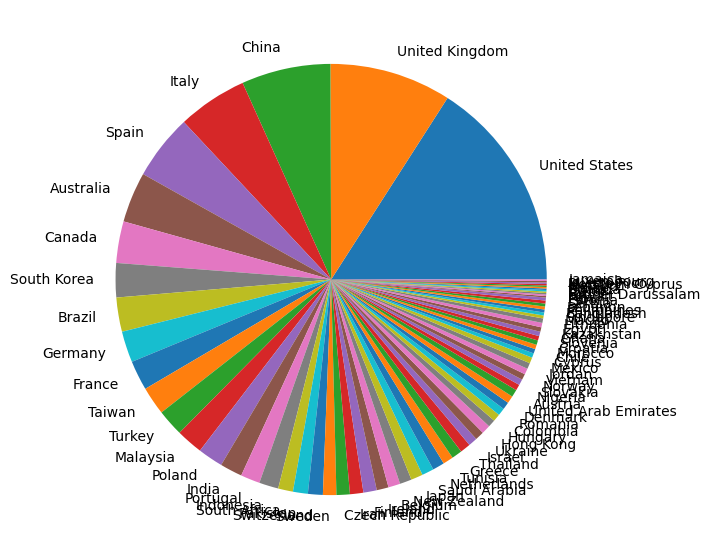

In [4]:
df['location'].value_counts().plot(kind='pie', figsize=(15,7), ylabel="")

Obviously, this is not ideal. Therefore, any country that appears less than 9 times will be categorized as "Other". The following output shows this has been executed successfully.

In [5]:
Count = df['location'].value_counts()
if (Count < 8).any():
    locations_to_replace = Count[Count < 8].index
    df['location'] = df['location'].replace(locations_to_replace, "Other")
print(df['location'].value_counts())

location
Other             146
United States     143
United Kingdom     82
China              60
Italy              47
Spain              44
Australia          34
Canada             28
Brazil             23
South Korea        23
Germany            21
France             20
Taiwan             19
Turkey             18
Malaysia           18
Poland             17
India              15
Portugal           13
Indonesia          13
South Africa       10
Switzerland        10
Pakistan           10
Finland             9
Sweden              9
Czech Republic      9
Iran                9
Belgium             8
Japan               8
New Zealand         8
Netherlands         8
Saudi Arabia        8
Ireland             8
Name: count, dtype: int64


Visualizing Location

Following the data manipulation, a much clearer read pie chart can be constructed.

A custom colour palette is created to prevent repetition of exact colours to eliminate colour-coding ambiguity.

Since I am in Canada, I am particularly interested to see where Canadian universities fall within the data so will highlight that segment.

Percentages will show on the segments only if equal to or greater than 3% to reduce clutter.

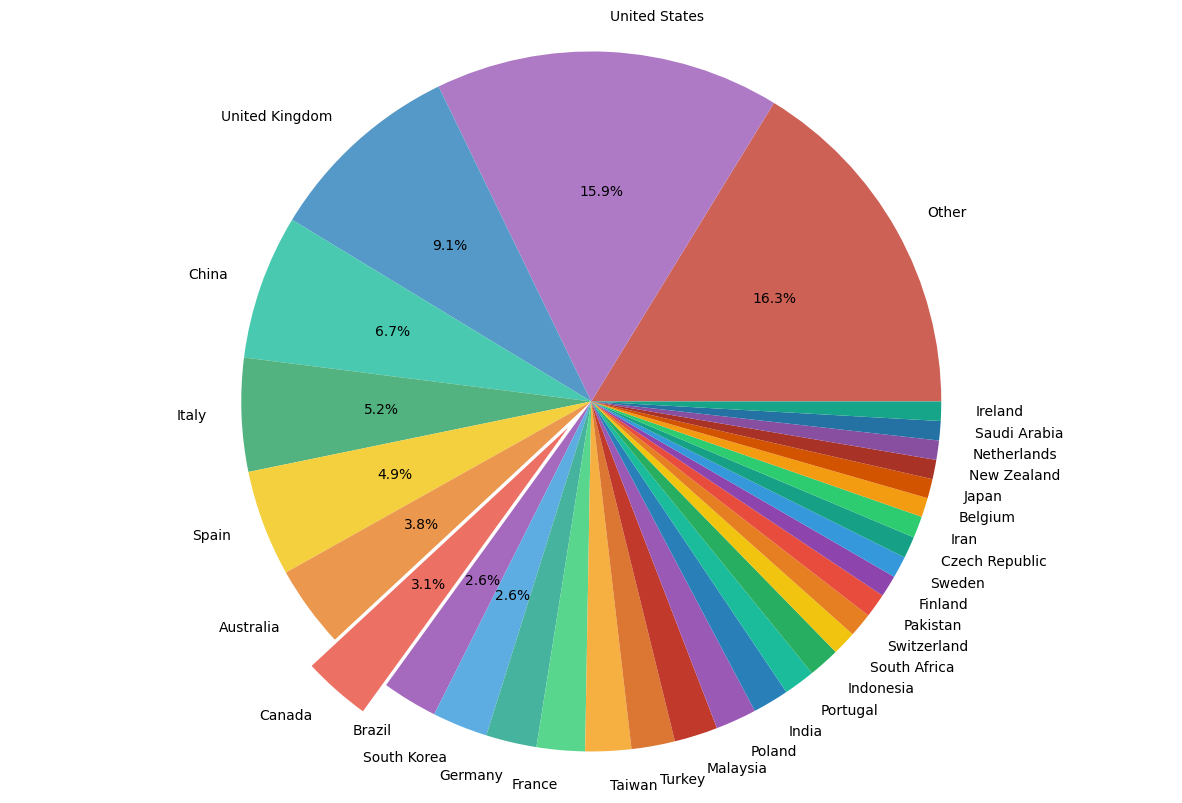

In [6]:
custom_colors = ['#cd6155', '#af7ac5', '#5499c7', '#48c9b0', '#52b380', '#f4d03f', '#eb984e', '#ec7063', 
                 '#a569bd', '#5dade2', '#45b39d', '#58d68d', '#f5b041', '#dc7633', '#c0392b', '#9b59b6', 
                 '#2980b9', '#1abc9c', '#27ae60', '#f1c40f', '#e67e22', '#e74c3c', '#8e44ad', '#3498db', 
                 '#16a085', '#2ecc71', '#f39c12', '#d35400', '#a93226', '#884ea0', '#2471a3', '#17a589']
my_explode = [0,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
percentage_threshold = 2.5
df['location'].value_counts().plot(kind='pie', figsize=(15,10), ylabel="", colors=custom_colors, explode=my_explode, 
                                   autopct=lambda p: '{:.1f}%'.format(p) if p > percentage_threshold else '', fontsize=10)
plt.axis('equal')
plt.show()

From the pie chart constructed, it can be seen that the largest percentage of univerisities are located in countries that appear in the top 1000 list less than 9 times. The country with the most top ranking universities is the United States; they have 1.75 times as many top ranking universities than the second spot country, the United Kingdom. The highlighted piece of Canada ranks 7th, not far behind Australia in 6th place.

Investigating Correlations

Next, I want to see if there is a correlation between the research environment and the research quality, and how that impacts the overall ranking of the university.

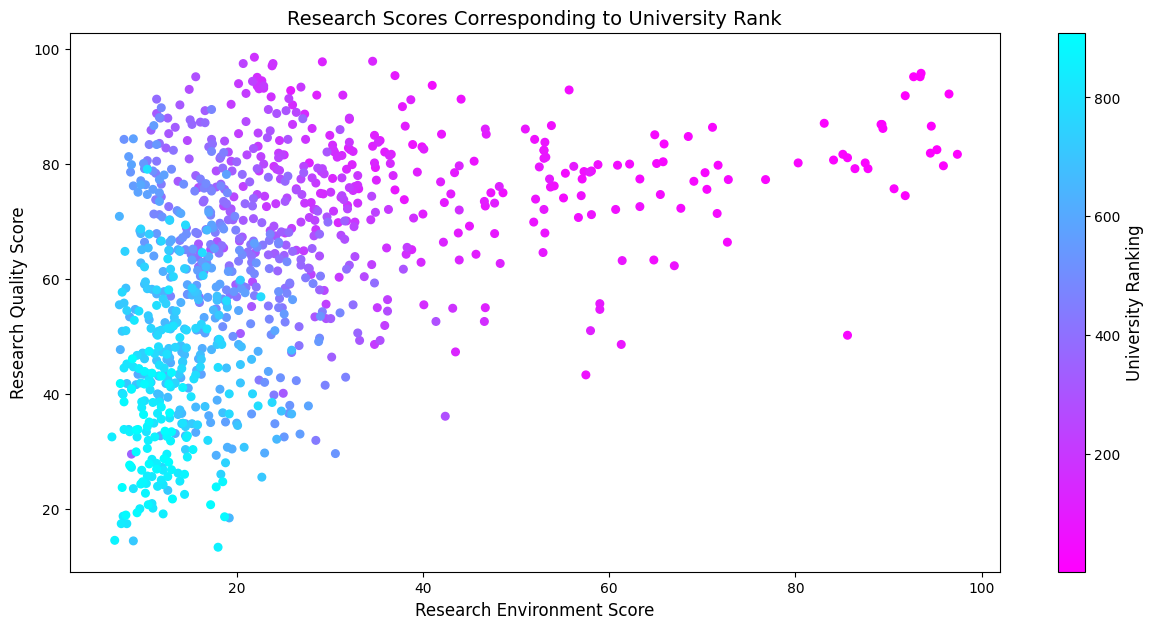

In [8]:
scatter_plot = df.plot.scatter(x='Research Environment Score', y='Research Quality Score', c='rank', 
                colormap='cool_r', s=30, figsize=(15,7))
scatter_plot.set_xlabel('Research Environment Score', fontsize=12)
scatter_plot.set_ylabel('Research Quality Score', fontsize=12)
scatter_plot.set_title('Research Scores Corresponding to University Rank', fontsize=14)

colorbar = scatter_plot.collections[0].colorbar
colorbar.set_label('University Ranking', fontsize=12)

plt.show()

Interestingly, it can be seen that there is not a strong, positive correlation between the research environment score and the research quality score. Many universities are able to achieve high research quality without necessarily having a high scoring research environment. However, the universities that score high on both parameters tend to be the ones that are higher ranking, with exceptions.

Lastly, I am investigating whether the international outlook of a university has any impact on the teaching performance. The motivating question behind this is: if a global perspective capturing a broad cultural landscape is incorporated into curriculum, does students' quality of education improve as a result?

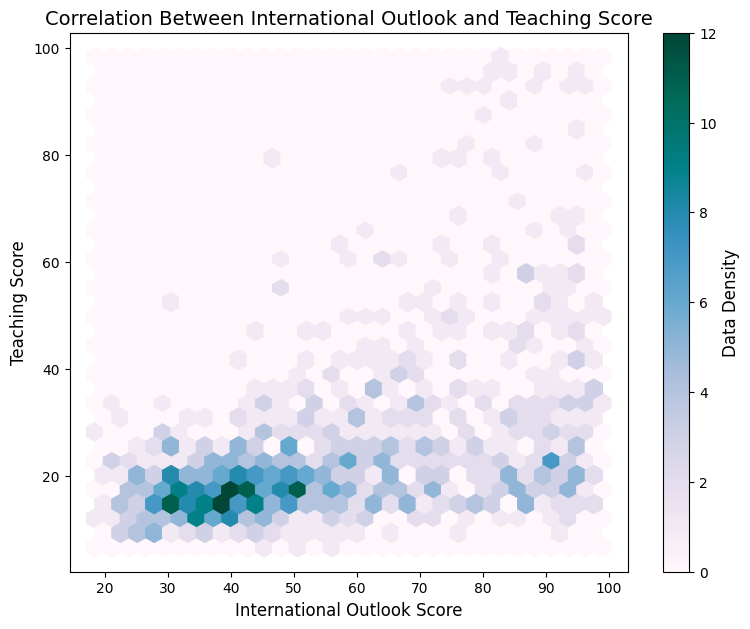

In [9]:
hexbin_plot = df.plot.hexbin(x='International Outlook', y='Teaching Score', gridsize= 30, cmap = 'PuBuGn', figsize=(9,7))

hexbin_plot.set_xlabel('International Outlook Score', fontsize=12)
hexbin_plot.set_ylabel('Teaching Score', fontsize=12)
hexbin_plot.set_title('Correlation Between International Outlook and Teaching Score', fontsize=14)

color_bar = hexbin_plot.collections[0].colorbar
color_bar.set_label('Data Density', fontsize=12)

For this visualization, I am opting for a hexbin plot as it would best represent data density. The darker coloured hexagons present areas of greater numbers of data points.

From the plot, it can be surmised that a low to moderate international outlook rating is linked to a low teaching score. By extension, universities who provide less opportunity for students to enagage in international experiences tend to provide a poorer quality of education.

A greater international outlook score does not always mean there will be a greater teaching score as there are many instances of both. A handful of universities score very high in both categories.

Future Investigation

If this topic were to be studied further, it would be beneficial to complile data in additional areas such as student satisfaction and alumni success in landing a job within a certain timeframe after graduation. I believe these would be interesting parameters to compare against the overall ranking of the university to see how individual welfare is impacted by institutional success.

I am welcome to feedback on this analysis and am open to questions.